<a href="https://colab.research.google.com/github/Chandu106/Binary_Classification_Adult_income_project_03/blob/main/adult_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **REQUIRED IMPORTS**

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# **READING THE DATA**

In [2]:
project = pd.read_csv("https://raw.githubusercontent.com/Chandu106/Adult_income/main/adult.csv")

In [3]:
project.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
project['income']

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48842, dtype: object

# **PREPROCESSING THE DATA**

In [5]:
project['income'].replace({'<=50K':0, ">50K":1},inplace=True)

In [6]:
project['income']

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

In [7]:
project.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [8]:
X = project.drop("income",axis=1)
y = project["income"]

In [9]:
X.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [10]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: income, dtype: int64

In [11]:
X1 = pd.get_dummies(X)
X1.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# **SPLITTING THE DATA INTO TRAINING AND TESTING**

In [12]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) 
     

In [13]:
len(X_train), len(X_test), len(y_train), len(y_test)

(39073, 9769, 39073, 9769)

# **MODEL-01(WITHOUT NORMALIZATION)**

In [14]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_01 = tf.keras.Sequential([
  tf.keras.layers.Dense(10000, activation="relu"), 
  tf.keras.layers.Dense(1000, activation="relu"), 
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

# Compile the model
model_01.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), 
                metrics=['accuracy'])

# Fit the model
history = model_01.fit(X_train, y_train, epochs=25)

Epoch 1/25
1222/1222 [==============================] - 20s 10ms/step - loss: 311.7591 - accuracy: 0.7200
Epoch 2/25
1222/1222 [==============================] - 12s 10ms/step - loss: 0.6059 - accuracy: 0.7632
Epoch 3/25
1222/1222 [==============================] - 6s 5ms/step - loss: 0.5562 - accuracy: 0.7595
Epoch 4/25
1222/1222 [==============================] - 7s 6ms/step - loss: 0.5518 - accuracy: 0.7595
Epoch 5/25
1222/1222 [==============================] - 6s 5ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 6/25
1222/1222 [==============================] - 7s 6ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 7/25
1222/1222 [==============================] - 7s 5ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 8/25
1222/1222 [==============================] - 7s 6ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 9/25
1222/1222 [==============================] - 7s 6ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 10/25
1222/1222 [==============================] - 7s 5ms/step - loss:

In [15]:
model_01.evaluate(X_test, y_test)

306/306 [==============================] - 1s 3ms/step - loss: 0.5446 - accuracy: 0.7656


[0.5446289777755737, 0.7655850052833557]

# **PREPROCESSING THE DATA**

In [16]:
project = pd.read_csv("https://raw.githubusercontent.com/Chandu106/Adult_income/main/adult.csv")

In [17]:
project.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [18]:
project['income'].replace({'<=50K':0, ">50K":1},inplace=True)

In [19]:
project.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [20]:

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#create column transformer

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "fnlwgt", "educational-num","capital-gain","capital-loss","hours-per-week"]),
)

# Create X & y
X = project.drop("income", axis=1)
y = project["income"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the model
ct.fit(X_train)

#transform training and test data with normalization and one hot encoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)
     

# **MODEL-02(WITH NORMALIZATION)**

In [21]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_02 = tf.keras.Sequential([
  tf.keras.layers.Dense(10000, activation="relu"), 
  tf.keras.layers.Dense(1000, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

# Compile the model
model_02.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), 
                metrics=['accuracy'])

# Fit the model
history = model_02.fit(X_train_normal, y_train, epochs=50)



Epoch 1/50
1222/1222 [==============================] - 9s 5ms/step - loss: 0.4077 - accuracy: 0.8109
Epoch 2/50
1222/1222 [==============================] - 8s 6ms/step - loss: 0.3970 - accuracy: 0.8154
Epoch 3/50
1222/1222 [==============================] - 6s 5ms/step - loss: 0.3931 - accuracy: 0.8174
Epoch 4/50
1222/1222 [==============================] - 7s 6ms/step - loss: 0.3914 - accuracy: 0.8176
Epoch 5/50
1222/1222 [==============================] - 6s 5ms/step - loss: 0.3885 - accuracy: 0.8192
Epoch 6/50
1222/1222 [==============================] - 7s 6ms/step - loss: 0.3870 - accuracy: 0.8206
Epoch 7/50
1222/1222 [==============================] - 6s 5ms/step - loss: 0.3850 - accuracy: 0.8208
Epoch 8/50
1222/1222 [==============================] - 7s 6ms/step - loss: 0.3845 - accuracy: 0.8213
Epoch 9/50
1222/1222 [==============================] - 6s 5ms/step - loss: 0.3842 - accuracy: 0.8224
Epoch 10/50
1222/1222 [==============================] - 7s 6ms/step - loss: 0.384

In [22]:
model_02.evaluate(X_test_normal,y_test)

306/306 [==============================] - 1s 3ms/step - loss: 0.3749 - accuracy: 0.8322


[0.37485986948013306, 0.8322243690490723]

# **CREATING THE CONFUSION MATRIX**

In [27]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_02.predict(X_test_normal)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

306/306 [==============================] - 1s 2ms/step


array([[7050,  429],
       [1210, 1080]])

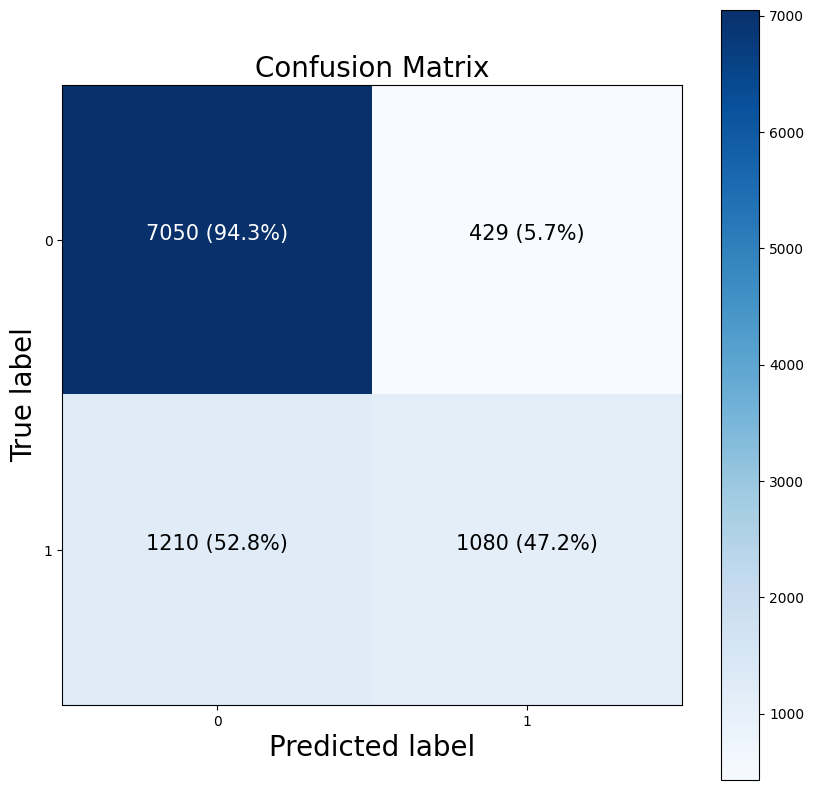

In [24]:
import itertools
import numpy as np

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] 
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) 
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)


# **PREDICTIONS ON THE TESTING DATA**

In [25]:
y1_preds=tf.cast(tf.round(y_preds),tf.int64)

In [31]:
import pandas as pd
pd.DataFrame(y1_preds , y_test)

,0
income,
0,0
0,0
1,1
0,0
0,0
...,...
1,1
1,1
1,0
